Gordon & Sorochenko (2002)
Appendix D.3 FORTRAN Code for Evaluating Radial Matrix Integrals

FORTRAN code for calculating radial integrals for hydrogen (Hoang-Binh,1990)

I have reviewed this code and at the end there is some data for transitions low state (n,l) = (6,1) and upper state (7,0)...(20,0).

I am going to calculate this data using ARC and compare it so I can find out how precise it is. For a fixed lower state, I will calculate:
* the square of R(n2,l1-1,n1,l1)
* f as absorption oscillator strength
* A as Einstein coefficient

This is the data in the book, page 291


NEXT STEPS: review FORTRAN code to learn more or try to migrate it to Python

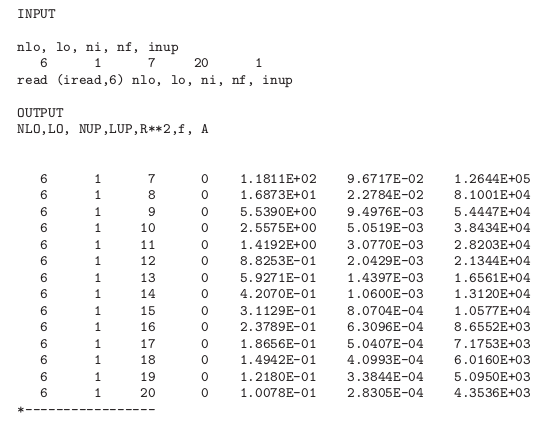

In [1]:
# Importing my ARC function and definitions to do the calculations
import numpy as np
import scipy.constants

from arc import *                 #Import ARC (Alkali Rydberg Calculator)

# Working with a Hydrogen atom
atom = Hydrogen()

In [2]:
#*****************************************************************************************************
# FUNCTION DEFINITIONS
#***************************************************************/

# Function to get the Dipole Moment from ARC and check that l state is valid
def getDipoleMoment( n1, l1, j1, n2, l2, j2 ):
    
    if ((l1 >= n1) or (l2 >= n2) or (l1 < 0) or (l2 < 0)):
        return float('nan')

    # Transition frequency Hz
    if ( ( (j1 == (l1+0.5)) or (j1 == (l1-0.5))) and ((j2 == (l2+0.5)) or (j2 ==(l2-0.5) ) ) )  :
        # Eq 2 in 
        R = atom.getRadialMatrixElement(n1, l1, j1, n2, l2, j2)
        return R
    else:
        return float('nan')
    

# Defining a function to calculate AOS
def getAbsorptionOscillatorStrength( n1, l1, j1, n2, l2, j2, RadialInt, tfreq ):
    #"This function calculates the absorption oscillator strength for the Radial Integral provided"
    Rydberg_Hz = scipy.constants.value(u'Rydberg constant times c in Hz')
    
    if RadialInt == 'nan':
        return float('nan')
    
    if ((l1 >= n1) or (l2 >= n2) or (l1 < 0) or (l2 < 0)):
        return float('nan')

    # Transition frequency Hz
    if ( ( (j1 == (l1+0.5)) or (j1 == (l1-0.5))) and ((j2 == (l2+0.5)) or (j2 ==(l2-0.5) ) ) )  :
     #   tfreq = atom.getTransitionFrequency(n1,l1,j1,n2,l2,j2)

        # Eq 2 in 
        f_n2_n1 = 1/3 * (tfreq/Rydberg_Hz) * (max(l1,l2)/(2*l2 +1)) * RadialInt
        return abs(f_n2_n1)
    else:
        return float('nan')
    
# Defining a function to calculate Einstein coefficient using ARC
def getARCEinsteinCoefficient( n1, l1, j1, n2, l2, j2 ):
    
    if ((l1 >= n1) or (l2 >= n2) or (l1 < 0) or (l2 < 0)):
        return float('nan')

    # 
    if ( ( (j1 == (l1+0.5)) or (j1 == (l1-0.5))) and ((j2 == (l2+0.5)) or (j2 ==(l2-0.5) ) ) )  :
        # Eq 2 in 
        A_n1_n2 = atom.getTransitionRate(n1, l1, j1, n2, l2, j2)
        return abs(A_n1_n2)
    else:
        return float('nan')



In [3]:
# INPUT
nlo  = 6   # n lower state, this is fixed for all calculation
lo   = 1   # l lower state, this is fixed for all calculation
ni   = 7   # n initial - upper state from the fixed lower state
nf   = 20  # n final - last state that will calculate
inup = 1   # increments of n for upper state

# I will print the same table than the book
print('INPUT\nnlo =\t%d\nlo =\t%d\nni =\t%d\nnf =\t%d\ninup =\t%d\n'
     % (nlo,lo,ni,nf,inup))
print('OUTPUT\nNLO\tLO\tNUP\tLUP\tR**2\t\tf\t\tA\t')

nup = ni
lup = 0
while nup < nf:
    # Calculate R**2
    R2 = getDipoleMoment(nlo, lo, lo+0.5, nup, lup, lup+0.5)**2
    # Calculate f
    tfreq = abs(atom.getTransitionFrequency(nlo,lo,lo+0.5,nup,lup,lup+0.5))
    f = getAbsorptionOscillatorStrength(nup,lup,lup+0.5,nlo,lo,lo+0.5,R2,tfreq)
    # Calculate A - I need to make sure how many paths are possible
    # In this calculation, n1 is the lower state, but in my other notebooks
    # n1 was the upper state, so I need to bear this in mind to check results
    # In this case, lup is +1, so has two paths
    # ARC requires that n1 is the upper level
    A = getARCEinsteinCoefficient(nup,lup,lup+0.5,nlo,lo,lo+0.5) + \
        getARCEinsteinCoefficient(nup,lup,lup+0.5,nlo,lo,lo-0.5)
    
    print('%d\t%d\t%d\t%d\t%1.4e\t%1.4e\t%1.4e\t' %
         (nlo,lo,nup,lup,R2,f,A))
    
    nup += inup
   

INPUT
nlo =	6
lo =	1
ni =	7
nf =	20
inup =	1

OUTPUT
NLO	LO	NUP	LUP	R**2		f		A	
6	1	7	0	1.1824e+02	9.6768e-02	1.2650e+05	
6	1	8	0	1.6893e+01	2.2798e-02	8.1046e+04	
6	1	9	0	5.5459e+00	9.5043e-03	5.4482e+04	
6	1	10	0	2.5609e+00	5.0558e-03	3.8462e+04	
6	1	11	0	1.4212e+00	3.0796e-03	2.8226e+04	
6	1	12	0	8.8379e-01	2.0447e-03	2.1362e+04	
6	1	13	0	5.9360e-01	1.4410e-03	1.6576e+04	
6	1	14	0	4.2136e-01	1.0610e-03	1.3132e+04	
6	1	15	0	3.1178e-01	8.0789e-04	1.0587e+04	
6	1	16	0	2.3828e-01	6.3167e-04	8.6644e+03	
6	1	17	0	1.8687e-01	5.0465e-04	7.1831e+03	
6	1	18	0	1.4968e-01	4.1043e-04	6.0231e+03	
6	1	19	0	1.2202e-01	3.3887e-04	5.1012e+03	


For zero temperature, if you ask for transition rate from lower to higher state you will get 0, as you do get. For some non-zero temperature of the background, the corresponding blackbody radiation at that temperature might drive transitions up, and you will get non-zero rates even for going up in energy (might be important for transitions in terahertz and radio domain, depending on background temperature). But, to get your expected Einstein coefficient, you just need to swap the order of states you enter in functions in the notebook, so that you calculate rate for going from higher energy state to lower energy state.

![image.png](attachment:image.png)

![image.png](attachment:image.png)